Level1-Task1


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 9551
Number of columns: 21


In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
target_column = 'Aggregate rating'
target_distribution = df[target_column].value_counts()
print("Distribution of the target variable:")
print(target_distribution)

Distribution of the target variable:
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


**Level1- Task2**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_stats = df[numeric_columns].describe()
print("Basic statistical measures for numerical columns:")
print(numeric_stats)

Basic statistical measures for numerical columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000 

In [ ]:
print("Number of unique values in Country Code:")
print(df['Country Code'].nunique())


Number of unique values in Country Code:
15


In [ ]:
print("Number of unique values in Country Code:")
print(df['Country Code'].nunique())

Number of unique values in Country Code:
15


In [ ]:
print("Number of unique values in Cuisines:")
print(df['Cuisines'].nunique())

Number of unique values in Cuisines:
1825


In [ ]:
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top cuisines with the highest number of restaurants:")
print(top_cuisines)

Top cuisines with the highest number of restaurants:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [ ]:
top_cities = df['City'].value_counts().head(10)
print("Top cities with the highest number of restaurants:")
print(top_cities)

Top cities with the highest number of restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


**Level1-Task3**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
map_center = [df['Latitude'].iloc[0], df['Longitude'].iloc[0]]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

In [ ]:
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)

In [ ]:
restaurant_map.save('restaurant_map.html')

In [ ]:
restaurant_count_per_city = df['City'].value_counts()
print("Number of restaurants per city:")
print(restaurant_count_per_city)

Number of restaurants per city:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


In [ ]:
if 'df' not in locals() or 'country' not in df.columns:
    print("Error: DataFrame 'df' or 'country' column not found.")
else:
    # Calculate the number of restaurants per country
    restaurant_count_per_country = df['country'].value_counts()

    # Print the result if there are any entries in the DataFrame
    if not restaurant_count_per_country.empty:
        print("Number of restaurants per country:")
        print(restaurant_count_per_country)
    else:
        print("No data available in the DataFrame.")

Error: DataFrame 'df' or 'country' column not found.


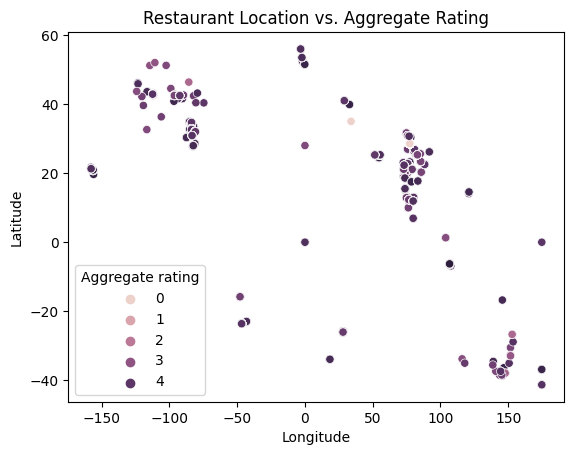

In [ ]:
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df)
plt.title('Restaurant Location vs. Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation between latitude, longitude, and rating:")
print(correlation)


Correlation between latitude, longitude, and rating:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000
